# IMPORTS

In [27]:
import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
import bokeh.plotting
from bokeh.models import PanTool,\
                        BoxZoomTool,\
                        HoverTool,\
                        ResetTool,\
                        SaveTool,\
                        Legend
from bokeh.io import output_notebook

## Plots style

In [2]:
# ploting
plt.rc('legend',fontsize='large')
plt.rc('lines', linewidth=2)
plt.rcParams.update({'axes.facecolor':'white'})

bokeh_tools = [PanTool(),
               BoxZoomTool(),
               HoverTool(),
               ResetTool(),
               SaveTool()]
output_notebook()

Loading BokehJS ...

# TRAINING and VALIDATION

In [3]:
with open('../model/history.pkl', 'rb') as file:
    history = pickle.load(file)

# turn in dataframe, concat epoch column.
history_df = pd.DataFrame(history)
epochs_col = np.arange(history_df.shape[0]) + 1
history_df = pd.concat([history_df,
                        pd.DataFrame({"epoch": epochs_col})],
                       axis=1)
history_df.tail()

,loss,recall,binary_accuracy,precision,false_negatives,false_positives,val_loss,val_recall,val_binary_accuracy,val_precision,val_false_negatives,val_false_positives,epoch
35,0.182172,0.932836,0.922646,0.938086,36.0,33.0,0.213490,0.880597,0.909910,0.967213,16.0,4.0,36
36,0.168861,0.938433,0.924888,0.936685,33.0,34.0,0.189256,0.947761,0.918919,0.920290,7.0,11.0,37
37,0.185946,0.942164,0.928251,0.938662,31.0,33.0,0.165006,0.888060,0.927928,0.991667,15.0,1.0,38
38,0.175806,0.932836,0.933856,0.956023,36.0,23.0,0.138138,0.985075,0.932432,0.910345,2.0,13.0,39
39,0.202713,0.927239,0.920404,0.939508,39.0,32.0,0.116051,0.962687,0.963964,0.977273,5.0,3.0,40


In [4]:
print(history_df.columns)

Index(['loss', 'recall', 'binary_accuracy', 'precision', 'false_negatives',
       'false_positives', 'val_loss', 'val_recall', 'val_binary_accuracy',
       'val_precision', 'val_false_negatives', 'val_false_positives', 'epoch'],
      dtype='object')


## Plotting function

In [91]:
def get_line_plot(x_data: pd.Series,
                  y1_data: pd.Series,
                  y2_data: pd.Series,
                  title: str) -> None:
    """
    Plot line graph for y1_data and y2_data.
    """
    fig = bokeh.plotting.figure(
        title=f"Model {title}",
        x_axis_label="Epoch",
        y_axis_label=f"{title}",
        height=400,
        width=1000,
        tools=bokeh_tools
    )

    fig.title.text_font_size = '20pt'
    fig.xaxis.axis_label_text_font_size = "15pt"
    fig.yaxis.axis_label_text_font_size = "15pt"
    fig.yaxis.major_label_text_font_size = "12pt"
    fig.xaxis.major_label_text_font_size = "12pt"

    fig.line(x_data,
             y1_data,
             legend_label=f"Training {title}",
             line_width=2,
             color='blue'
            )
    fig.line(x_data,
             y2_data,
             legend_label=f"Validation {title}",
             line_width=2,
             color='red'
             )

    fig.legend.location = 'right'

    bokeh.plotting.show(fig)

## Errors function

In [92]:
def get_diff(train_data: pd.Series,
             val_data: pd.Series,
             number_last_values: int) -> dict:
    """
    Return dict with error metrics.
    """
    diff = np.array(val_data[-number_last_values:]
                    - train_data[-number_last_values:])
    mean_diff = np.mean(diff)
    std_diff = np.std(diff)
    max_diff = np.max(diff)
    min_diff = np.min(diff)
    
    abs_diff = np.abs(diff)
    abs_mean_diff = np.mean(abs_diff)
    abs_std_diff = np.std(abs_diff)
    abs_max_diff = np.max(abs_diff)
    abs_min_diff = np.min(abs_diff)
    
    metrics = dict(
        mean_diff=mean_diff,
        std_diff=std_diff,
        max_diff=max_diff,
        min_diff=min_diff,
        abs_mean_diff=abs_mean_diff,
        abs_std_diff=abs_std_diff,
        abs_max_diff=abs_max_diff,
        abs_min_diff=abs_min_diff
    )
    
    return [metrics]

## Metrics

In [93]:
METRICS = ["Loss",
           "Recall",
           "Accuracy",
           "Precision"]
NUMBER_LAST_EPOCHS = 10

for counter, metric in enumerate(METRICS):
    if metric != "Accuracy":
        train_name = metric.lower()
        val_name = "val_" + train_name
    else:
        train_name = "binary_accuracy"
        val_name = "val_" + train_name
    
    get_line_plot(history_df.epoch,
                  history_df[train_name],
                  history_df[val_name],
                  metric)
    
    values = get_diff(history_df[train_name],
                               history_df[val_name],
                               NUMBER_LAST_EPOCHS)
    values_df = pd.DataFrame(values).T
    values_df.columns = [metric]
    print(values_df)
    
    if counter > 0:
        numeric_df = pd.concat([numeric_df, values_df], axis=1)
    else:
        numeric_df = values_df

                   Loss
mean_diff     -0.012223
std_diff       0.037686
max_diff       0.044888
min_diff      -0.086662
abs_mean_diff  0.033855
abs_std_diff   0.020579
abs_max_diff   0.086662
abs_min_diff   0.011555


                 Recall
mean_diff     -0.000746
std_diff       0.043332
max_diff       0.074627
min_diff      -0.055970
abs_mean_diff  0.036567
abs_std_diff   0.023260
abs_max_diff   0.074627
abs_min_diff   0.007463


               Accuracy
mean_diff      0.007302
std_diff       0.018704
max_diff       0.043560
min_diff      -0.018422
abs_mean_diff  0.015150
abs_std_diff   0.013178
abs_max_diff   0.043560
abs_min_diff   0.000323


               Precision
mean_diff       0.015175
std_diff        0.036729
max_diff        0.057252
min_diff       -0.045678
abs_mean_diff   0.037022
abs_std_diff    0.014447
abs_max_diff    0.057252
abs_min_diff    0.016395


# Comparisons

In [94]:
numeric_df

,Loss,Recall,Accuracy,Precision
mean_diff,-0.012223,-0.000746,0.007302,0.015175
std_diff,0.037686,0.043332,0.018704,0.036729
max_diff,0.044888,0.074627,0.043560,0.057252
min_diff,-0.086662,-0.055970,-0.018422,-0.045678
abs_mean_diff,0.033855,0.036567,0.015150,0.037022
abs_std_diff,0.020579,0.023260,0.013178,0.014447
abs_max_diff,0.086662,0.074627,0.043560,0.057252
abs_min_diff,0.011555,0.007463,0.000323,0.016395


# QUANTIZATION ERRORS

In [95]:
with open('../model/qt_metrics.pkl', 'rb') as file:
    qt_metrics = pickle.load(file)

# turn in dataframe, concat epoch column.
qt_df = pd.DataFrame(qt_metrics)
qt_df

,diff,mean,std,abs_diff,abs_mean,abs_std
0,0.032791,0.009616,0.024578,0.032791,0.013159,0.022878
1,0.028308,0.009616,0.024578,0.028308,0.013159,0.022878
2,0.008670,0.009616,0.024578,0.008670,0.013159,0.022878
3,0.003585,0.009616,0.024578,0.003585,0.013159,0.022878
4,0.000012,0.009616,0.024578,0.000012,0.013159,0.022878
...,...,...,...,...,...,...
887,-0.003886,0.009616,0.024578,0.003886,0.013159,0.022878
888,-0.003752,0.009616,0.024578,0.003752,0.013159,0.022878
889,-0.003857,0.009616,0.024578,0.003857,0.013159,0.022878
890,-0.003395,0.009616,0.024578,0.003395,0.013159,0.022878


In [96]:
def get_diff_metrics(diff: pd.Series) -> dict:
    """
    Return dict with error metrics.
    """
    mean_diff = np.mean(diff)
    std_diff = np.std(diff)
    max_diff = np.max(diff)
    min_diff = np.min(diff)
    
    abs_diff = np.abs(diff)
    abs_mean_diff = np.mean(abs_diff)
    abs_std_diff = np.std(abs_diff)
    abs_max_diff = np.max(abs_diff)
    abs_min_diff = np.min(abs_diff)
    
    metrics = dict(
        mean_diff=mean_diff,
        std_diff=std_diff,
        max_diff=max_diff,
        min_diff=min_diff,
        abs_mean_diff=abs_mean_diff,
        abs_std_diff=abs_std_diff,
        abs_max_diff=abs_max_diff,
        abs_min_diff=abs_min_diff
    )
    
    return [metrics]

## Numeric metrics

In [97]:
qt_errors = get_diff_metrics(qt_df["diff"])
errors_df = pd.DataFrame(qt_errors).T
errors_df.columns = ["Quantization training errors"]
errors_df

,Quantization training errors
mean_diff,0.009616
std_diff,0.024578
max_diff,0.206836
min_diff,-0.053043
abs_mean_diff,0.013159
abs_std_diff,0.022878
abs_max_diff,0.206836
abs_min_diff,0.000012


In [98]:
def get_percentage_inside(number_std: int) -> float:
    """
    Return the percentage of values inside "number_std" standard deviations.
    """
    low = errors_df.T["mean_diff"][0] - (number_std * errors_df.T["std_diff"][0])
    print("low =", low)
    high = errors_df.T["mean_diff"][0] + (number_std * errors_df.T["std_diff"][0])
    print("high =", high)

    insiders_filter = (qt_df["diff"] > low) & (qt_df["diff"] < high)
    # qt_df["diff"].between(low, high)
    insiders = qt_df["diff"][insiders_filter]
    print(f"insiders percentage for {number_std} std =",
          insiders.shape[0] / qt_df["diff"].shape[0])

In [99]:
for number_std in range(1,4):
    print(f"For {number_std} standard deviation(s):")
    get_percentage_inside(number_std)
    print()

For 1 standard deviation(s):
low = -0.014961722306907177
high = 0.034193784929811954
insiders percentage for 1 std = 0.8677130044843049

For 2 standard deviation(s):
low = -0.03953947592526674
high = 0.05877153854817152
insiders percentage for 2 std = 0.9461883408071748

For 3 standard deviation(s):
low = -0.06411722954362631
high = 0.08334929216653109
insiders percentage for 3 std = 0.9719730941704036



## Histogram plot

In [100]:
bins = np.linspace(errors_df.T["min_diff"], errors_df.T["max_diff"], 50)
bins = bins.flatten()
hist, edges = np.histogram(qt_df["diff"], bins=bins, density=True)

fig = bokeh.plotting.figure(
        title=f"Quantization errors - Training",
        x_axis_label="Sample",
        y_axis_label=f"Samples (%)",
        height=500,
        width=1000,
        tools=bokeh_tools
    )

fig.title.text_font_size = '20pt'
fig.xaxis.axis_label_text_font_size = "15pt"
fig.yaxis.axis_label_text_font_size = "15pt"
fig.yaxis.major_label_text_font_size = "12pt"
fig.xaxis.major_label_text_font_size = "12pt"

fig.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
         fill_color="skyblue",
         line_color="white",
         legend_label="Quantized - Floating point")

bokeh.plotting.show(fig)

In [101]:
qt_df["diff"].describe()

count    892.000000
mean       0.009616
std        0.024592
min       -0.053043
25%       -0.003459
50%        0.000621
75%        0.010024
max        0.206836
Name: diff, dtype: float64

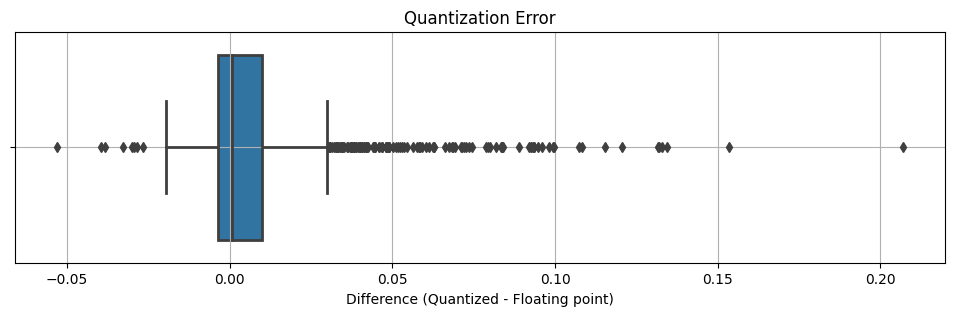

In [109]:
fig = plt.figure(figsize=(12,3))
sns.boxplot(x=qt_df["diff"])
plt.title("Quantization Error")
plt.xlabel("Difference (Quantized - Floating point)")
plt.grid(True)